# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [340]:
data = pd.read_csv('data/Wholesale_Data.csv')

In [341]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [343]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


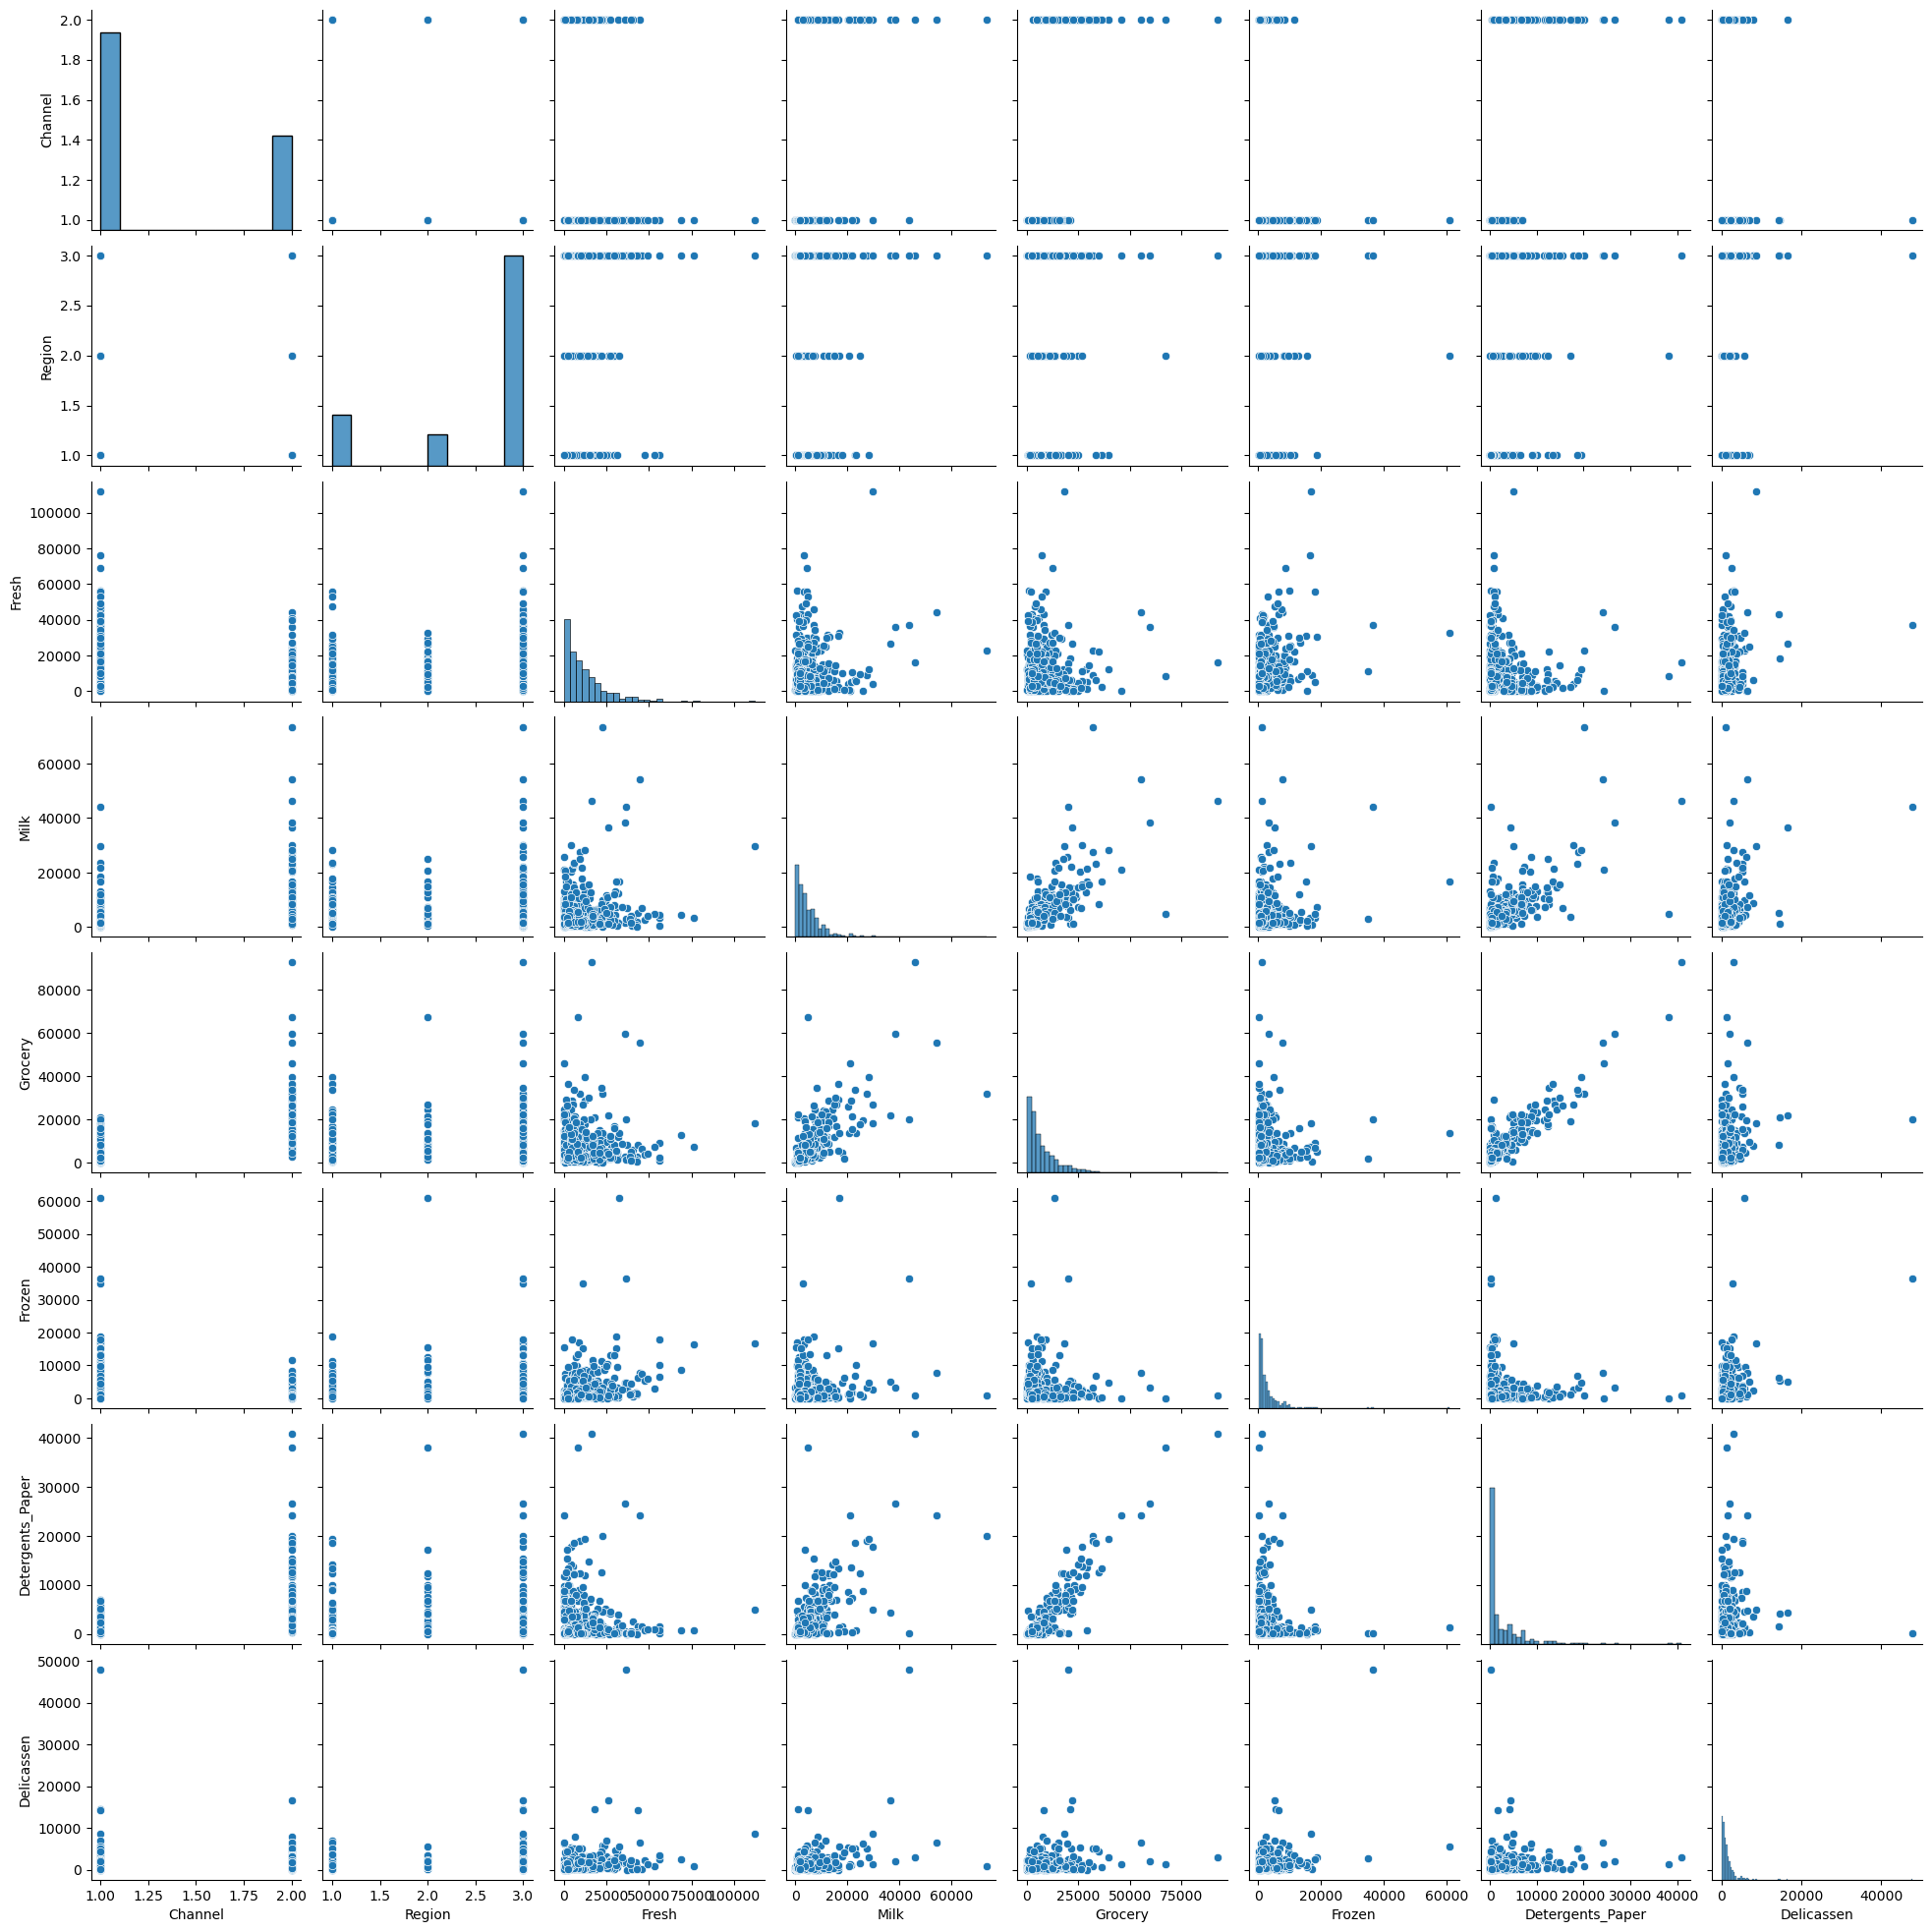

In [344]:
sns.pairplot(data)

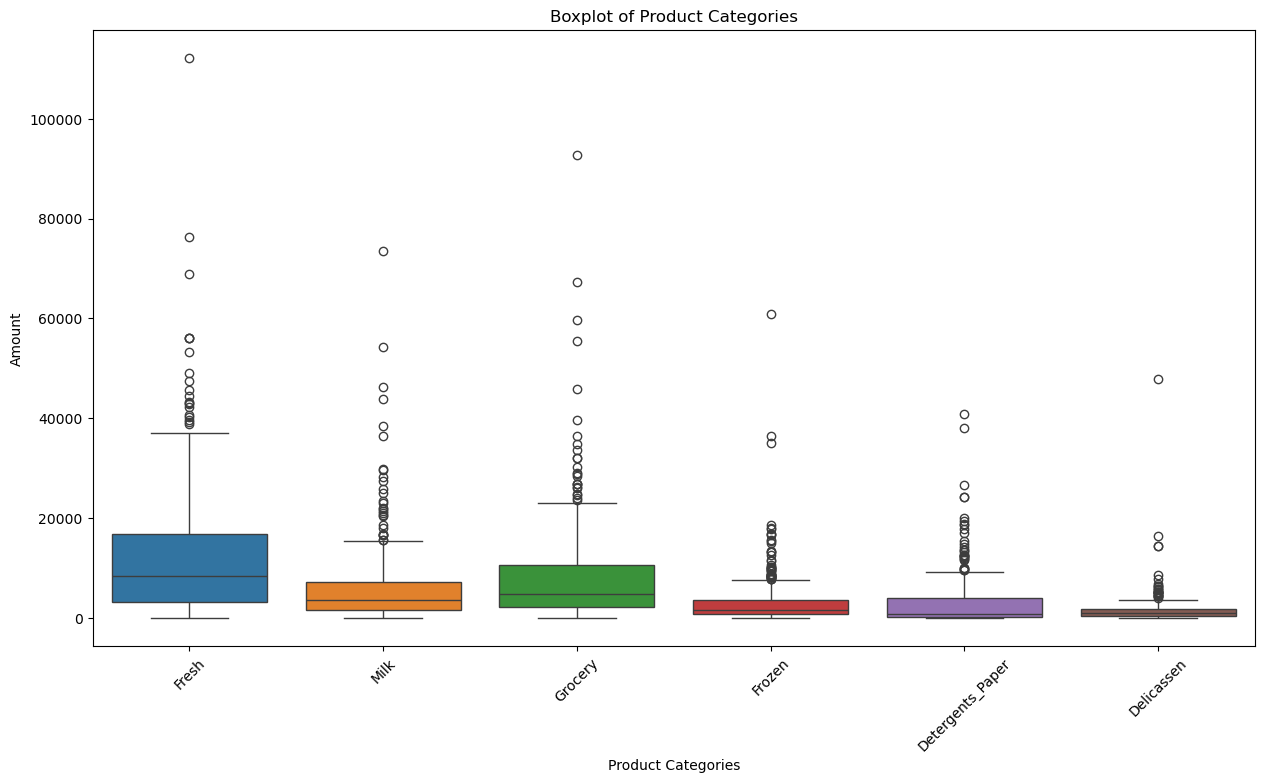

In [345]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.title('Boxplot of Product Categories')
plt.ylabel('Amount')
plt.xlabel('Product Categories')
plt.xticks(rotation=45)
plt.show()


<Axes: >

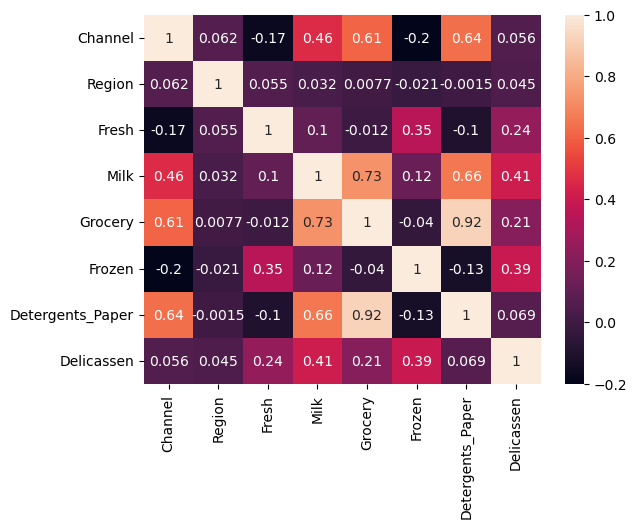

In [346]:
#create heatmap of each variable
data_corr = data.corr()
sns.heatmap(data_corr, annot=True)

In [347]:
#removin outliers based on IQR method
df_filtered = data.copy()

for col in df_filtered.columns:
    if col in ['Region', 'Channel']:
        continue

    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df_filtered = df_filtered[
        (df_filtered[col] >= lower_bound) & 
        (df_filtered[col] <= upper_bound)
    ]

In [348]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           318 non-null    int64
 1   Region            318 non-null    int64
 2   Fresh             318 non-null    int64
 3   Milk              318 non-null    int64
 4   Grocery           318 non-null    int64
 5   Frozen            318 non-null    int64
 6   Detergents_Paper  318 non-null    int64
 7   Delicassen        318 non-null    int64
dtypes: int64(8)
memory usage: 22.4 KB


In [349]:
#dropping some values that appear too low and are not caught by the IQR method
df_temp = df_filtered.drop(['Region', 'Channel'], axis=1)

mask = (df_temp < 5).any(axis=1)

df_masked = df_filtered[~mask]

df_masked.describe()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,1.275641,2.551282,9672.846154,3974.230769,5579.544872,1785.080128,1860.711538,990.535256
std,0.447555,0.775798,8060.904724,3257.064632,4637.132132,1594.858646,2216.188047,783.713027
min,1.000000,1.000000,9.000000,55.000000,137.000000,25.000000,5.000000,7.000000
25%,1.000000,2.000000,3077.000000,1352.500000,2004.500000,575.750000,232.000000,370.000000
50%,1.000000,3.000000,7801.500000,3045.000000,3732.500000,1194.500000,700.000000,749.500000
75%,2.000000,3.000000,14054.250000,6134.000000,8489.750000,2543.750000,3300.000000,1443.750000
max,2.000000,3.000000,36817.000000,15729.000000,20292.000000,6845.000000,8077.000000,3271.000000


In [350]:
df_masked.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           312 non-null    int64
 1   Region            312 non-null    int64
 2   Fresh             312 non-null    int64
 3   Milk              312 non-null    int64
 4   Grocery           312 non-null    int64
 5   Frozen            312 non-null    int64
 6   Detergents_Paper  312 non-null    int64
 7   Delicassen        312 non-null    int64
dtypes: int64(8)
memory usage: 21.9 KB


In [351]:
df_masked.shape

(312, 8)

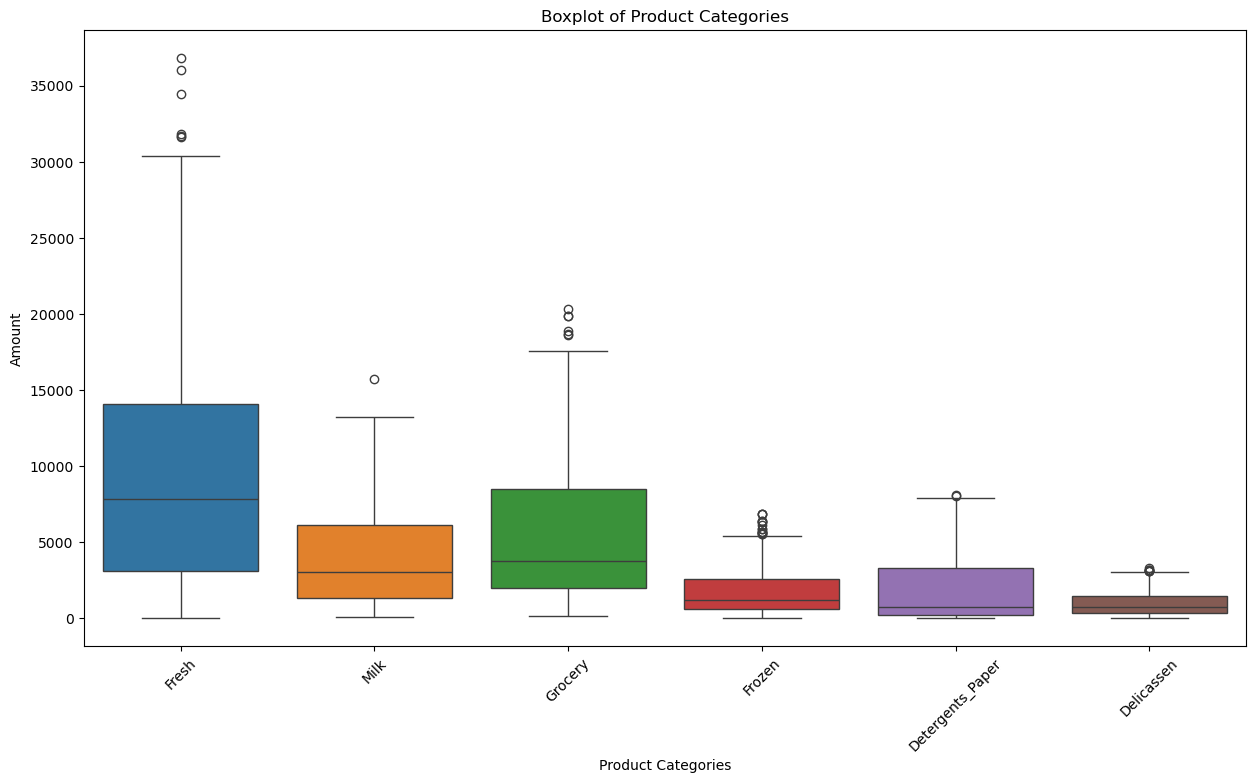

In [352]:
#recreating box plots after removing low values
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_masked[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])
plt.title('Boxplot of Product Categories')
plt.ylabel('Amount')
plt.xlabel('Product Categories')
plt.xticks(rotation=45)
plt.show()

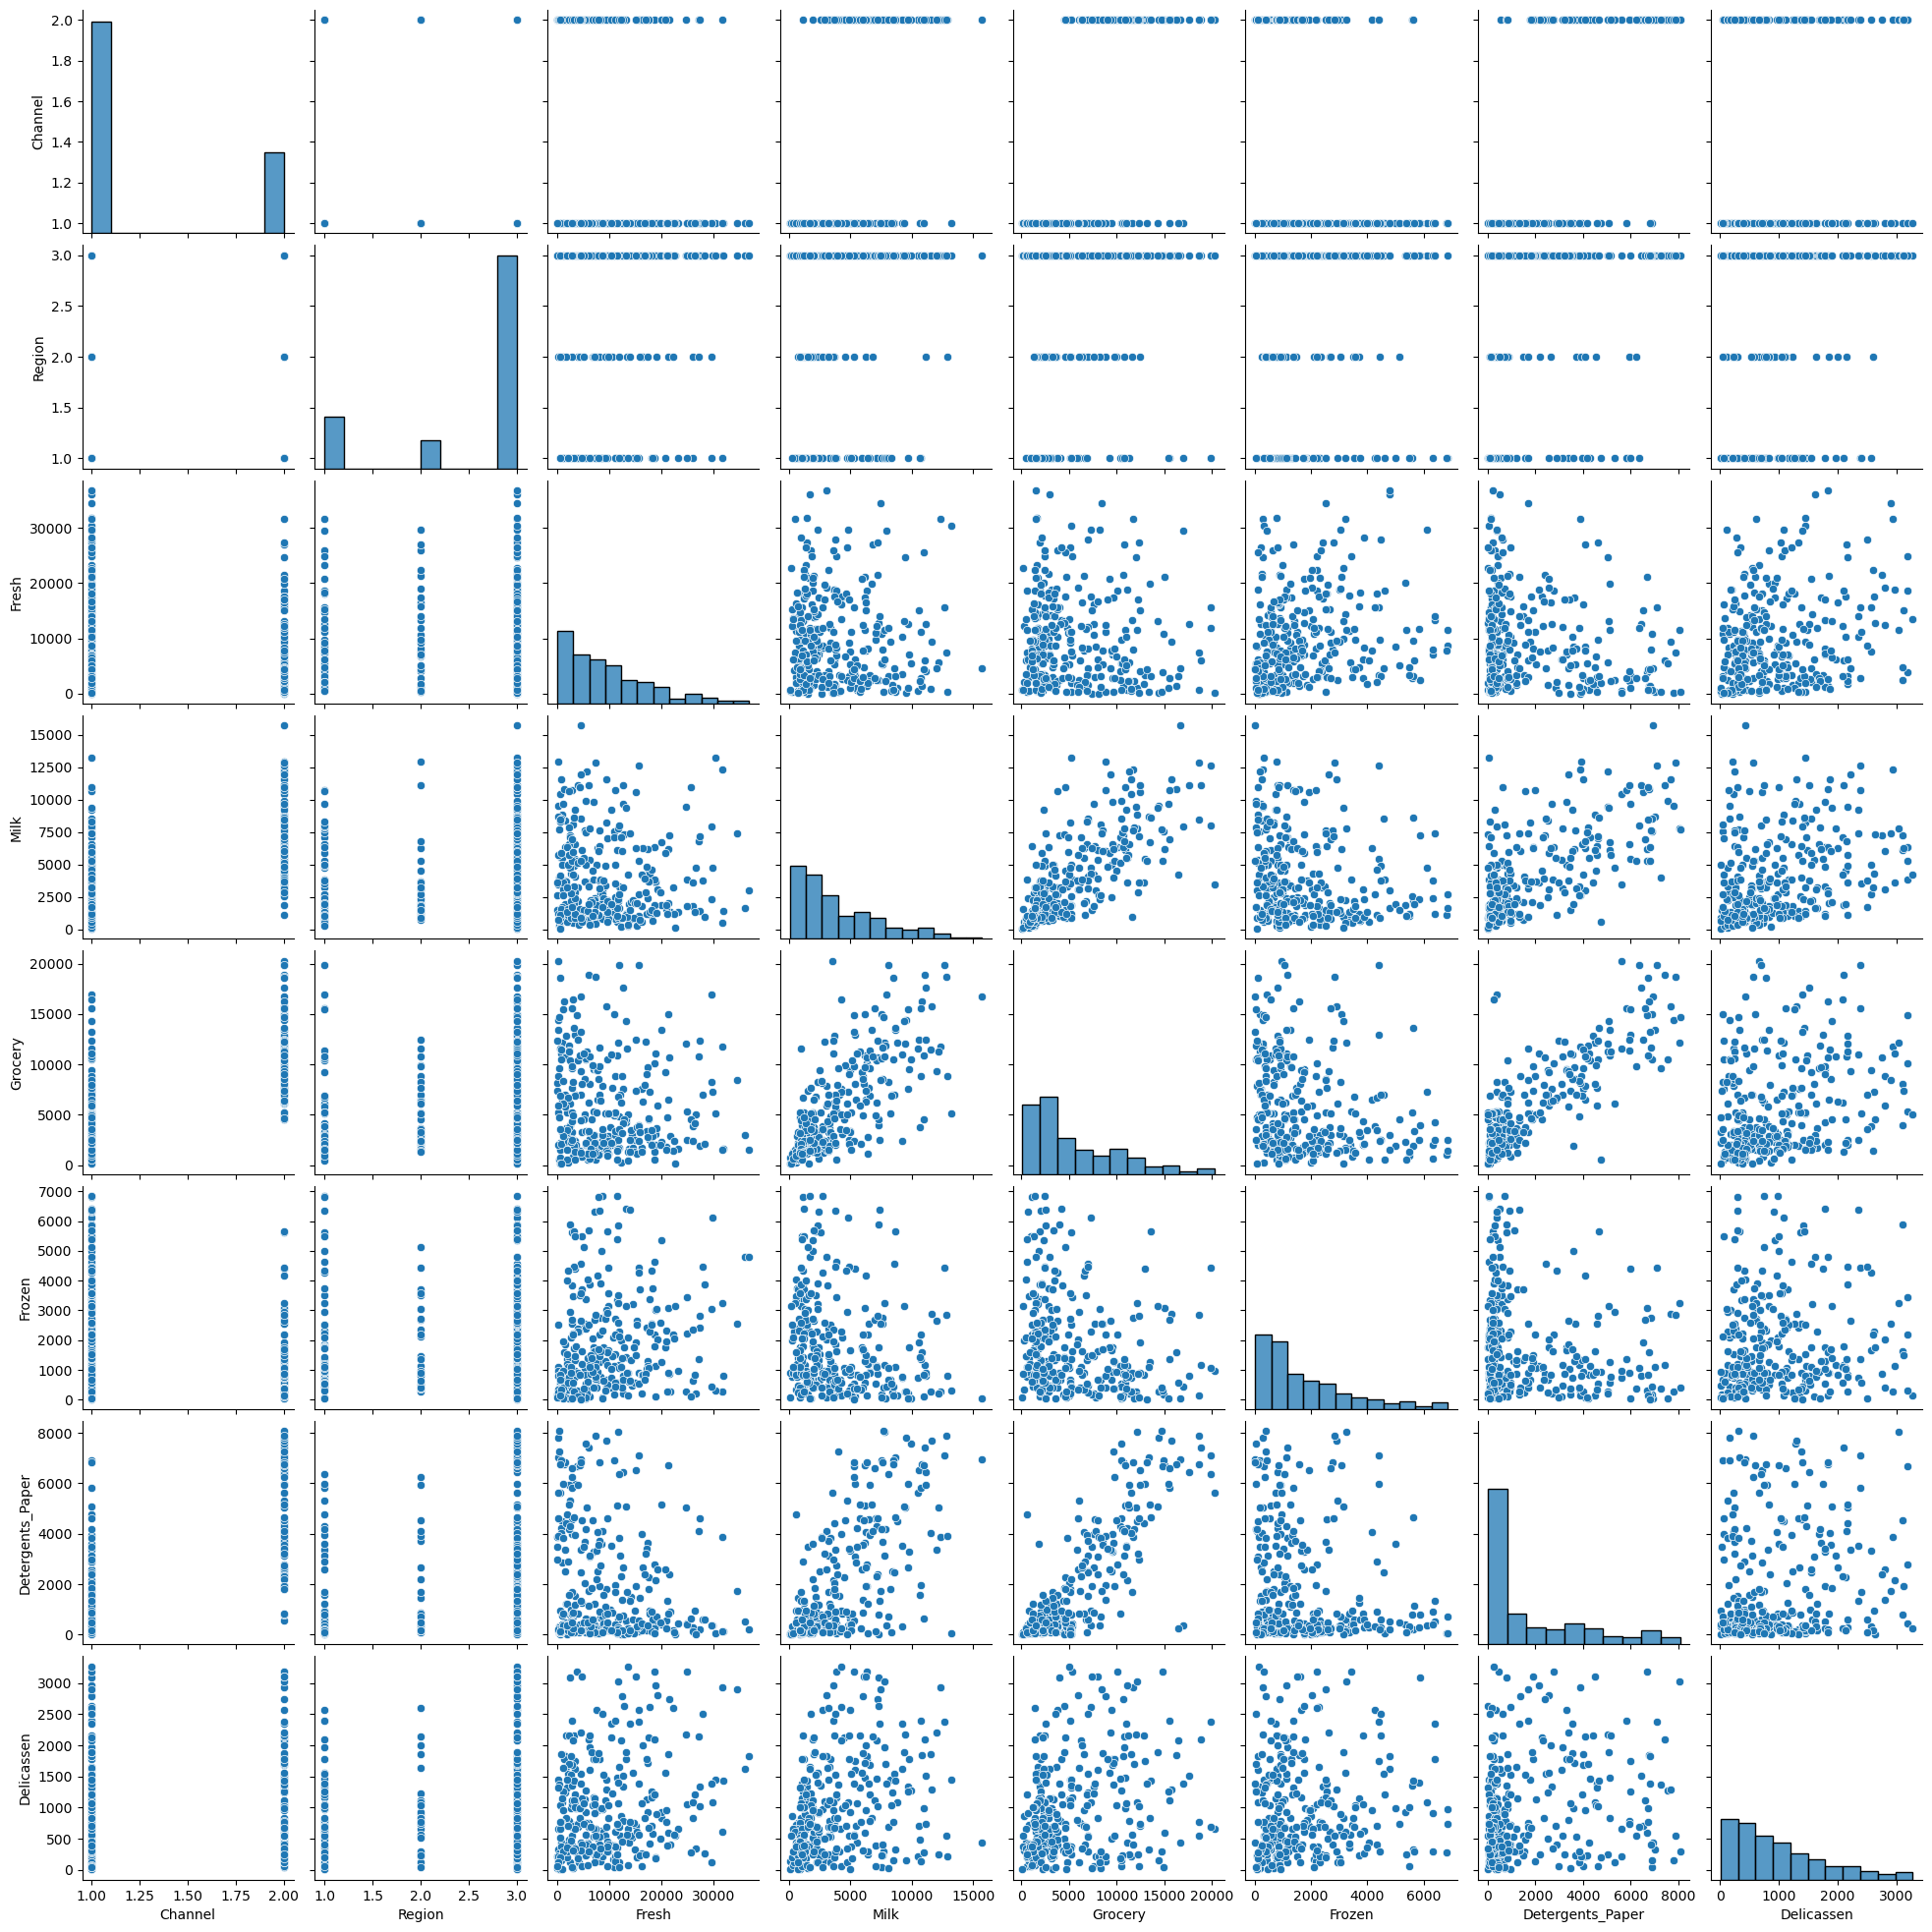

In [353]:
sns.pairplot(df_masked)

<Axes: >

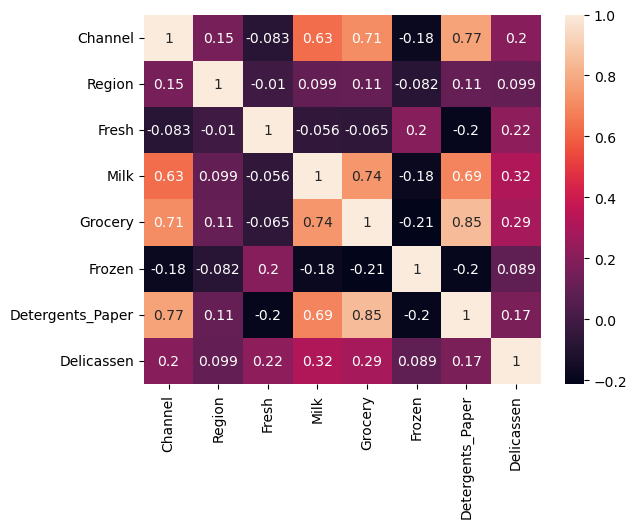

In [354]:
df_corr = df_masked.corr()
sns.heatmap(df_corr, annot=True)

In [355]:
df = df_masked.copy()

In [356]:
#applying log transformation to the data as well as standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_log_transformed = np.log(df.drop(['Region', 'Channel'], axis=1))

data_scaled = scaler.fit_transform(df_log_transformed)

# Creating a DataFrame for the scaled data
df_scaled = pd.DataFrame(data_scaled, columns=df_log_transformed.columns)

# Displaying the scaled data
df_scaled.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.619814,1.317109,0.728056,-1.474337,0.832732,0.667060
1,0.157771,1.333406,0.976819,0.418665,0.965020,0.933431
2,0.656114,-0.834098,0.112088,1.577395,-0.223687,0.939765
3,0.385241,1.156148,0.317350,-0.454926,0.579513,0.743323
4,0.585223,0.179251,0.642813,-0.748995,0.934794,-0.177748


In [357]:
# Extracting 'Region' and 'Channel'
categorical_data = df[['Region', 'Channel']]

# Concatenating the categorical data with the scaled data
df_final = pd.concat([categorical_data, df_scaled], axis=1)

print(df_final.describe())

           Region     Channel         Fresh          Milk       Grocery  \
count  312.000000  312.000000  3.120000e+02  3.120000e+02  3.120000e+02   
mean     2.551282    1.275641 -5.195274e-16 -4.042350e-16 -1.121610e-15   
std      0.775798    0.447555  1.001606e+00  1.001606e+00  1.001606e+00   
min      1.000000    1.000000 -5.104764e+00 -4.005814e+00 -3.510026e+00   
25%      2.000000    1.000000 -4.976865e-01 -7.075525e-01 -6.747938e-01   
50%      3.000000    1.000000  2.369647e-01  1.284344e-01 -1.810424e-02   
75%      3.000000    2.000000  7.017500e-01  8.497733e-01  8.504686e-01   
max      3.000000    2.000000  1.462193e+00  1.819662e+00  1.771229e+00   

             Frozen  Detergents_Paper    Delicassen  
count  3.120000e+02      3.120000e+02  3.120000e+02  
mean  -6.148928e-16      3.017529e-16 -1.829021e-16  
std    1.001606e+00      1.001606e+00  1.001606e+00  
min   -3.402241e+00     -3.158266e+00 -4.274004e+00  
25%   -5.856769e-01     -7.203617e-01 -5.421250e-01  


In [358]:
df_final.isnull().sum()

Region              93
Channel             93
Fresh               93
Milk                93
Grocery             93
Frozen              93
Detergents_Paper    93
Delicassen          93
dtype: int64

In [359]:
#removing nulls from the reintroduction of channel and region
df_final.dropna(inplace=True)
df_final.isnull().sum()

Region              0
Channel             0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [360]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [361]:
km = KMeans(n_clusters=3,
            n_init=50, 
            random_state=42)

y_km = km.fit_predict(df_final)

In [362]:
df_final.columns

Index(['Region', 'Channel', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

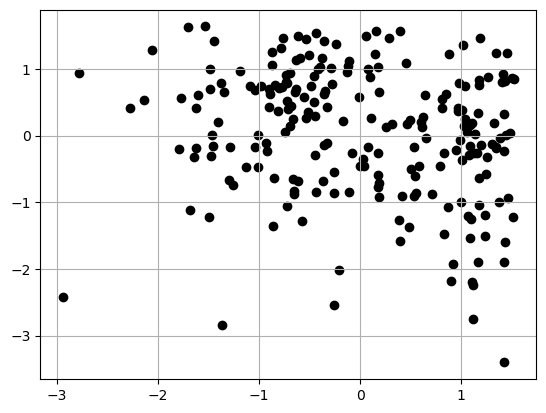

In [363]:
#selecting just two columns to plot for visualization sake
plt.scatter(df_final.iloc[:,-2],
            df_final.iloc[:, -3],
            c='black',
            marker='o')
plt.grid()
plt.show()

In [364]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters + 1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

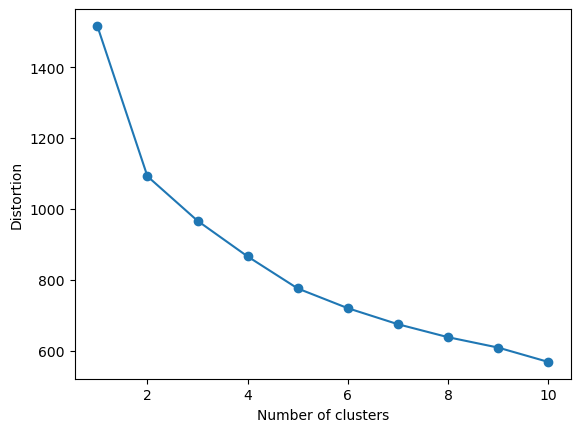

In [365]:
plot_distortion(df_final, max_clusters=10)

In [366]:
k = 2 #based on elbow rule and plotted data

km_opt = KMeans(n_clusters=k,
                n_init=50,
                )

y_km = km_opt.fit_predict(df_final)

In [367]:
y_km.shape

(219,)

In [368]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [369]:
df_np = df_final.iloc[:,[-2,-3]].to_numpy()

In [370]:
df_np.shape

(219, 2)

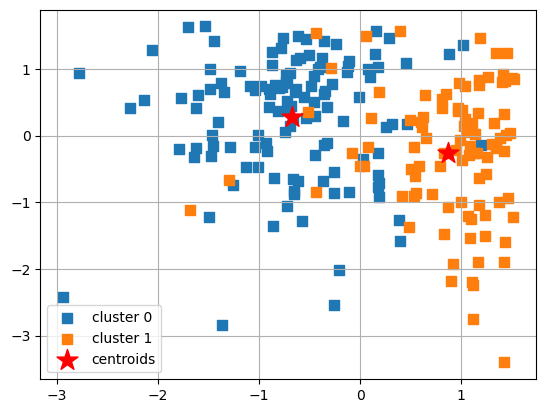

In [371]:
plot_clusters(df_np, y_km, plt_cluster_centers=True)

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [372]:
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters=2)

In [373]:
y_hc = ac.fit_predict(df_final)
y_hc.shape

(219,)

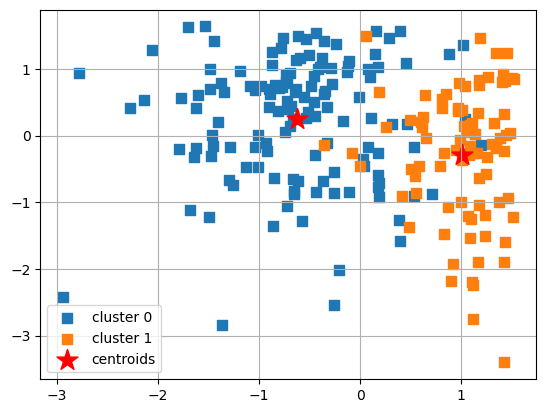

In [374]:
df_np = df_final.iloc[:,[-2,-3]].to_numpy()

plot_clusters(df_np, y_hc, plt_cluster_centers=True)

In [375]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

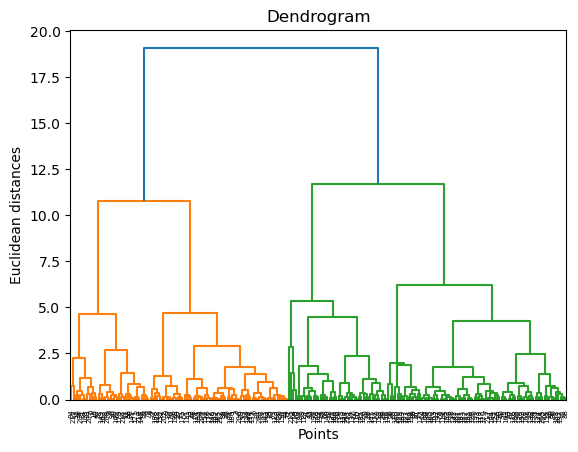

In [376]:
plot_dendrogram(df_np)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [377]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_final)

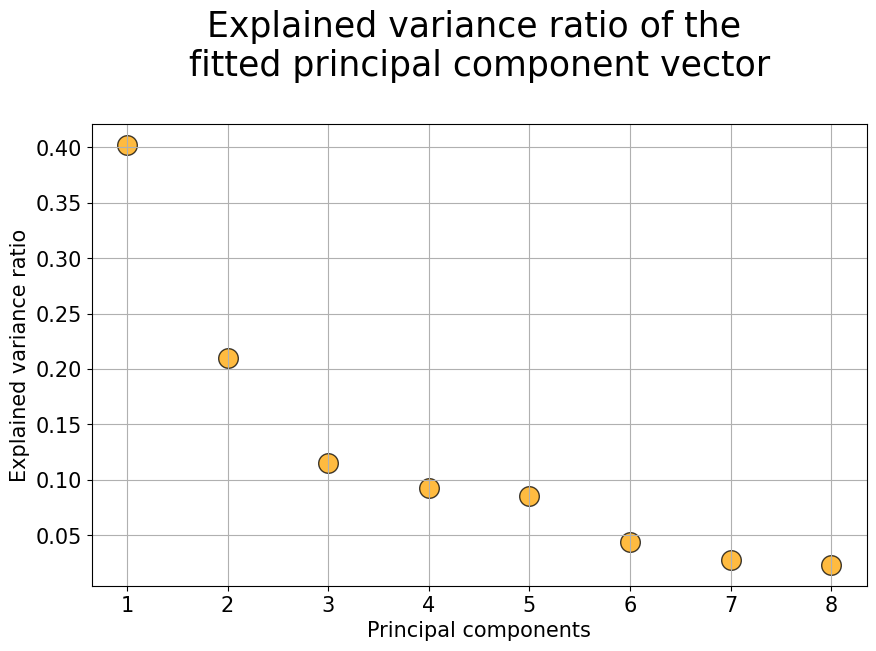

In [378]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

In [379]:
pca.explained_variance_ratio_

array([0.40233139, 0.20965593, 0.1155574 , 0.09251677, 0.08514077,
       0.04410724, 0.02737352, 0.02331698])

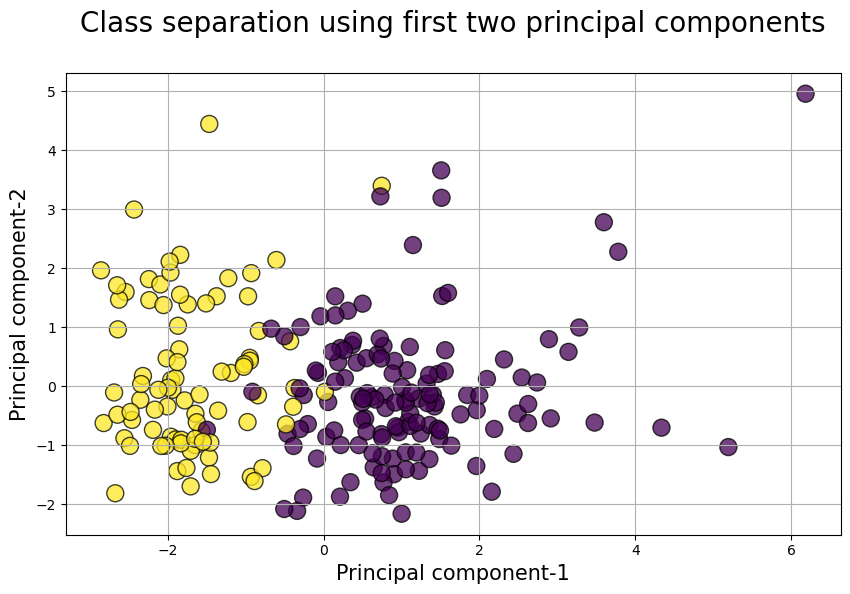

In [380]:
dfx_trans = pca.transform(df_final)
dfx_trans = pd.DataFrame(data=dfx_trans)

plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],edgecolors='k', c=y_hc,alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- PCA had the best results for visualizing the different clusters
- Between KMeans and Hierarchical, Hierarchical clustering appears to have less overlap of data points between the two models
- The distortion plot showed 2 clusters (when plotting two variables) for the optimal number of clusters. 
- the large range in values warranted a log and standard scaler be applied to the data in order to obtain better results from the model